In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import datetime
import pandas as pd

In [51]:
data = pd.read_csv('Grant_0508_afternoon.txt',sep='\t',header=1,skiprows=[2,3])
#df = data[0:367] # April 5
#df = data[367:1807] # April 6
#df = data[1807:3247] # April 7
#df = data[3247:4679] # April 8
#df = data[4679:6119] # April 9
#df = data[0:6119] # April 5-9 # Early Data
#df = data[6119:7559] # April 10
#df = data[7559:8999] # April 11
#df = data[8999:10439] # April 12
#df = data[10439:11879] # April 13
#df = data[11879:13312] # April 14
#df = data[13312:14752] # April 15
#df = data[13312:16192] # April 15&16
#df = data[14752:16192] # April 16
#df = data[16192:17632] # April 17
#df = data[16192:19072] # April 17&18
#df = data[17632:19072] # April 18
#df = data[17632:20510] # April 18&19
#df = data[19070:20510] # April 19
#df = data[19070:21948] # April 19&20
#df = data[20508:21948] # April 20
#df = data[20508:23386] # April 20&21
#df = data[21946:23386] # April 21
#df = data[23384:24824] # April 22
#df = data[24824:26264] # April 23
#df = data[20508:26264] # April 20-23
#df = data[26264:27704] # April 24
#df = data[27704:29144] # April 25
#df = data[26264:29144] # April 24&25
#df = data[29144:30584] # April 26
#df = data[30584:32024] # April 27
#df = data[29144:32024] # April 26&27
#df = data[32024:33464] # April 28
#df = data[33464:34904] # April 29
#df = data[32024:34904] # April 28&29
#df = data[34904:36344] # April 30
#df = data[21946:27704] # April 21-24 Chicago Trip
#df = data[21946:36344] # April 21-30 Chicago Trip
#df = data[36339:37753] # May 1
#df = data[37753:39184] # May 2
#df = data[36339:39184] # May 1-2
#df = data[39189:40624] # May 3
#df = data[40629:42064] # May 4
#df = data[39189:42064] # May 3-4
#df = data[42064:43504] # May 5
#df = data[43504:44944] # May 6
#df = data[44944:46384] # May 7
df = data[46384:47824] # May 8

In [52]:
46389+1440

47829

In [53]:
timestamp = pd.to_datetime(df['TIMESTAMP'])
RN = df['RECORD']
batt_volts = df['BattV']
ptemp_C = df['PTemp_C']
O3_ppm = df['O3']
NO2_ppm = df['NO2']
SO2_ppm = df['SO2']
CO_ppm = df['CO']
VOC_ppm = df['VOC']
NMHC_ppm = df['NMHC']
temp_C = df['AirTC']
temp_F = (temp_C*(1.8))+32
RH = df['RH']
wspd1 = df['WS_ms_2']
wdir1 = df['WindDir']
wspd2 = df['WS_ms']
flx_down = df['H_FlxDSlrkW']*1000
tot_down = df['H_TFlxSlrMJ_Tot']
flx_up = df['L_FlxDSlrkW']*1000
tot_up = df['L_FlxSlrMJ_Tot']
wvect_spd = df['WS_ms_2_S_WVT']
wvect_dir = df['WindDir_D1_WVT']

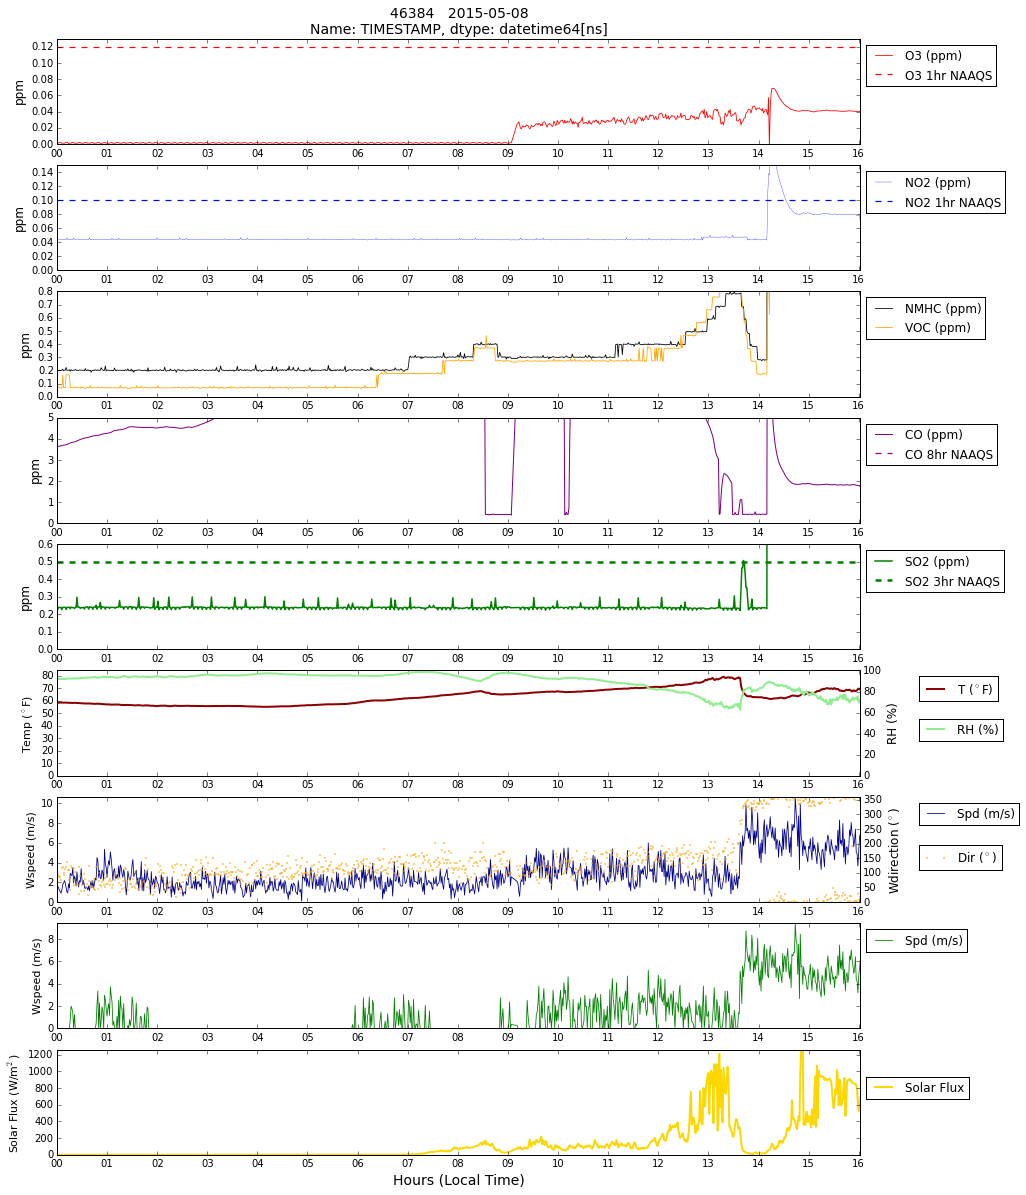

In [54]:
plt.figure(figsize=[18,20])

timestamp = timestamp.astype(datetime.datetime)
xfmt = mdates.DateFormatter('%H')
zeros = O3_ppm*0

ax1 = plt.subplot(9,1,1)
ax1.xaxis.set_major_formatter(xfmt)
ax1.plot(timestamp,O3_ppm,linewidth=0.8, c='r',label='O3 (ppm)')
ax1.plot(timestamp,zeros+0.12,c='r',linewidth=1.2,linestyle='--',label='O3 1hr NAAQS')
ax1.set_title(timestamp[0:1],fontsize=14)
ax1.set_ylabel('ppm',fontsize=12)
ax1.set_ylim(0,0.13)
        
ax10 = plt.subplot(9,1,2)
ax10.xaxis.set_major_formatter(xfmt)
ax10.plot(timestamp,NO2_ppm,linewidth=0.3, c='blue',label='NO2 (ppm)')
ax10.plot(timestamp,zeros+0.1,c='b',linewidth=1.2,linestyle='--',label='NO2 1hr NAAQS')
ax10.set_ylabel('ppm', fontsize=12)
ax10.set_ylim(0,0.15)     
    
ax2 = plt.subplot(9,1,3)
ax2.xaxis.set_major_formatter(xfmt)
ax2.plot(timestamp,NMHC_ppm, linewidth=0.8, c='black',label='NMHC (ppm)')
ax2.plot(timestamp,VOC_ppm, linewidth=0.8, c='orange',label='VOC (ppm)')
ax2.set_ylabel('ppm', fontsize=12)
ax2.set_ylim(0,0.8)    

ax3 = plt.subplot(9,1,4)
ax3.xaxis.set_major_formatter(xfmt)
ax3.plot(timestamp,CO_ppm, linewidth=1,c='purple',label='CO (ppm)')
ax3.plot(timestamp,zeros+9,c='purple',linewidth=1.2,linestyle='--',label='CO 8hr NAAQS')
ax3.set_ylabel('ppm', fontsize=12)
ax3.set_ylim(0,5)

ax4 = plt.subplot(9,1,5)
ax4.xaxis.set_major_formatter(xfmt)
ax4.plot(timestamp,SO2_ppm, linewidth=1.5,c='g',label='SO2 (ppm)')
ax4.plot(timestamp,zeros+0.5,c='g',linewidth=2.5,linestyle='--',label='SO2 3hr NAAQS')
ax4.set_ylabel('ppm', fontsize=12)
ax4.set_ylim(0,0.6)

ax5 = plt.subplot(9,1,6)
ax5.xaxis.set_major_formatter(xfmt)
ax5.set_ylim(0,max(temp_F)+5)
ax5.plot(timestamp,temp_F, linewidth=2, c='darkred',label = 'T ($^\circ$F)')
ax5.set_ylabel('Temp ($^\circ$F)', fontsize=11)

ax6 = ax5.twinx()
ax6.xaxis.set_major_formatter(xfmt)
ax6.set_ylim(0,100)
ax6.plot(timestamp,RH, linewidth=2, c='lightgreen',label = 'RH (%)')
ax6.set_ylabel('RH (%)', fontsize=12)

ax7 = plt.subplot(9,1,7)
ax7.xaxis.set_major_formatter(xfmt)
ax7.set_ylim(0,max(wspd1))
ax7.plot(timestamp,wspd1,linewidth=0.8,c='darkblue',label = 'Spd (m/s)')
ax7.set_ylabel('Wspeed (m/s)', fontsize=11)

ax8 = ax7.twinx()
ax8.xaxis.set_major_formatter(xfmt)
ax8.set_ylim(0,360)
ax8.plot(timestamp,wdir1,marker='.',markersize=2,linestyle='none',c='orange',label = 'Dir ($^\circ$)')
ax8.set_ylabel('Wdirection ($^\circ$)', fontsize=12)

ax11 = plt.subplot(9,1,8)
ax11.xaxis.set_major_formatter(xfmt)
ax11.set_ylim(0,max(wspd2))
ax11.plot(timestamp,wspd2,linewidth=0.8,c='green',label = 'Spd (m/s)')
ax11.set_ylabel('Wspeed (m/s)', fontsize=11)

ax9 = plt.subplot(9,1,9)
ax9.xaxis.set_major_formatter(xfmt)
ax9.set_ylim(0,max(flx_up))
ax9.plot(timestamp,flx_up, linewidth=2, c='gold',label='Solar Flux')
ax9.set_ylabel('Solar Flux (W/m$^2$)', fontsize=11)
ax9.set_xlabel('Hours (Local Time)', fontsize=14)

box1 = ax1.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
box10 = ax10.get_position()
ax10.set_position([box10.x0, box10.y0, box10.width * 0.8, box10.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
box3 = ax3.get_position()
ax3.set_position([box3.x0, box3.y0, box3.width * 0.8, box3.height])
box4 = ax4.get_position()
ax4.set_position([box4.x0, box4.y0, box4.width * 0.8, box4.height])
box5 = ax5.get_position()
ax5.set_position([box5.x0, box5.y0, box5.width * 0.8, box5.height])
box6 = ax6.get_position()
ax6.set_position([box6.x0, box6.y0, box6.width * 0.8, box6.height])
box7 = ax7.get_position()
ax7.set_position([box7.x0, box7.y0, box7.width * 0.8, box7.height])
box8 = ax8.get_position()
ax8.set_position([box8.x0, box8.y0, box8.width * 0.8, box8.height])
box9 = ax9.get_position()
ax9.set_position([box9.x0, box9.y0, box9.width * 0.8, box9.height])
box11 = ax11.get_position()
ax11.set_position([box11.x0, box11.y0, box11.width * 0.8, box11.height])

### Set For Time Label ###

ax1.xaxis.set_major_locator(mdates.HourLocator())
ax2.xaxis.set_major_locator(mdates.HourLocator())
ax3.xaxis.set_major_locator(mdates.HourLocator())
ax4.xaxis.set_major_locator(mdates.HourLocator())
ax5.xaxis.set_major_locator(mdates.HourLocator())
ax6.xaxis.set_major_locator(mdates.HourLocator())
ax7.xaxis.set_major_locator(mdates.HourLocator())
ax8.xaxis.set_major_locator(mdates.HourLocator())
ax9.xaxis.set_major_locator(mdates.HourLocator())
ax10.xaxis.set_major_locator(mdates.HourLocator())
ax11.xaxis.set_major_locator(mdates.HourLocator())

# ax1.xaxis.set_major_locator(mdates.DayLocator())
# ax2.xaxis.set_major_locator(mdates.DayLocator())
# ax3.xaxis.set_major_locator(mdates.DayLocator())
# ax4.xaxis.set_major_locator(mdates.DayLocator())
# ax5.xaxis.set_major_locator(mdates.DayLocator())
# ax6.xaxis.set_major_locator(mdates.DayLocator())
# ax7.xaxis.set_major_locator(mdates.DayLocator())
# ax8.xaxis.set_major_locator(mdates.DayLocator())
# ax9.xaxis.set_major_locator(mdates.DayLocator())
# ax10.xaxis.set_major_locator(mdates.DayLocator())
# ax11.xaxis.set_major_locator(mdates.DayLocator())

ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax10.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax5.legend(loc='upper left', bbox_to_anchor=(1.065, 1))
ax6.legend(loc='upper left', bbox_to_anchor=(1.065, 0.6))
ax7.legend(loc='upper left', bbox_to_anchor=(1.065, 1))
ax8.legend(loc='upper left', bbox_to_anchor=(1.065, 0.6))
ax9.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
ax11.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()